<a href="https://colab.research.google.com/github/sasongko8888/wpu-resolusi/blob/main/UMKM_Revisi_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies

In [1]:
!pip install pycaret shap --use-deprecated=legacy-resolver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Library

In [2]:
# Meng-import Library yang akan digunakan

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
from pycaret.classification import *
from scipy.stats import zscore
from scipy.linalg import pinv, inv

matplotlib.style.use('ggplot')
%matplotlib inline

## Exploratory Data Analysis

In [3]:
# Membaca  file CSV
df = pd.read_csv("/content/startup data.csv")

# Melihat 10 sample data pada datasets
df.sample(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
643,110,NH,42.737022,-71.487298,3062,c:14028,Nashua,NaN,AutoVirt,0,...,c:14028,1,1,1,1,0,0,2.0000,1,closed
455,1133,CA,37.762185,-122.467269,94104,c:921,San Francisco,NaN,Consorte Media,1,...,c:921,0,0,0,1,0,0,2.0000,1,acquired
578,44,CA,37.486571,-122.229161,94063,c:1148,Redwood City,NaN,Predictify,0,...,c:1148,0,0,1,0,0,0,2.0000,1,closed
635,684,CA,37.779281,-122.419236,94133,c:39399,San Francisco,San Francisco CA 94133,Sweepery,0,...,c:39399,0,0,0,0,0,0,1.0000,1,closed
570,441,MA,42.398866,-71.253781,2451,c:25743,Waltham,NaN,Aveksa,1,...,c:25743,0,0,1,1,1,0,2.6667,1,acquired
846,519,WA,47.602416,-122.332614,98104,c:2955,Seattle,NaN,PI Corporation,1,...,c:2955,0,0,0,1,0,0,1.0000,1,acquired
355,1063,CA,37.764169,-122.402021,94110,c:767,San Francisco,NaN,TripIt,1,...,c:767,0,1,0,1,1,0,1.6667,1,acquired
916,284,NY,40.742953,-73.984461,10018,c:17758,New York,NaN,TRAFFIQ,1,...,c:17758,1,0,1,1,0,0,2.3333,1,acquired
425,300,CA,37.561111,-122.270487,94404,c:18080,Foster City,NaN,Etology,0,...,c:18080,0,0,1,0,0,0,3.0000,0,closed
270,802,MA,42.504817,-71.195611,1803,c:45792,Burlington,Burlington MA 1803,Intrusic,0,...,c:45792,0,0,1,1,0,0,3.0000,1,closed


In [4]:
# Melihat berapa banyak row dan columns pada data

print(f'Dataset ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Dataset ini memiliki 923 baris dan 49 kolom


In [5]:
# Mengecek apakah ada value yang redundant

print(f'Ada {df.duplicated().sum()} value yang redundant')

Ada 0 value yang redundant


In [6]:
# Melihat kolom-kolom yang ada pada data

df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [7]:
# Melihat deskripsi statistik 

df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [8]:
# Melihat informasi jumlah value dan tipe data dari setiap columns pada dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

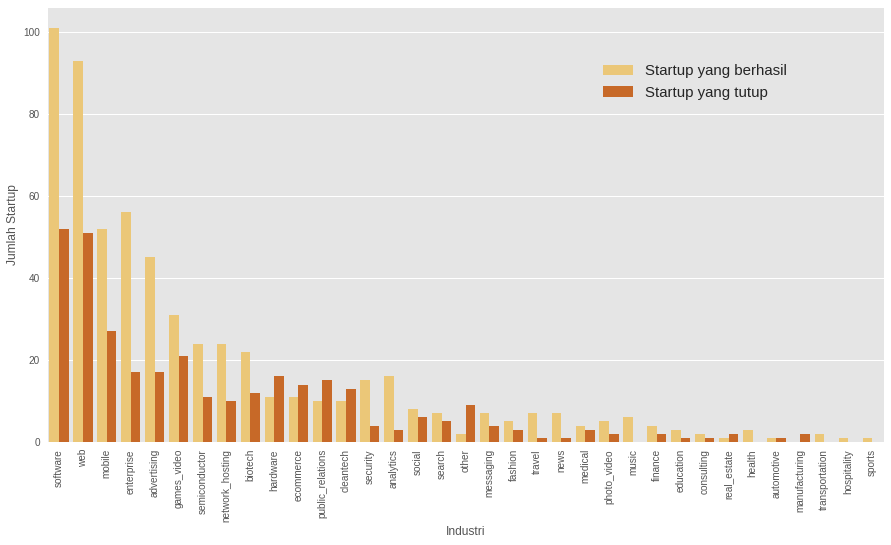

In [9]:
# Melihat distribusi kolom "status"

fig, ax = plt.subplots(figsize=(15,8))
dist_industri = sns.countplot(x="category_code", hue="status", data= df, 
              order = df.category_code.value_counts().index,  palette='YlOrBr')
dist_industri = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dist_industri = ax.set(xlabel="Industri", ylabel="Jumlah Startup")
plt.legend(['Startup yang berhasil', 'Startup yang tutup'], bbox_to_anchor=(0.9, 0.9), fontsize=15 )

Dari grafik ini kita bisa tahu bahwa Startup dengan kategori "software" memiliki jumlah kesuksesan terbanyak disusul dengan startup kategori "web" dengan jumlah kesuksesan paling kecil yaitu kategori "sport"

In [10]:
#Menampilkan data kategori industri pada pie chart

industri = 'is_software is_web is_mobile is_enterprise is_advertising is_gamesvideo is_ecommerce is_biotech is_consulting is_othercategory'.split()

label = [i[3:].title() for i in industri]
fig = px.pie(names=label, values=df[industri].value_counts(), height=600, color_discrete_sequence=px.colors.sequential.YlOrBr)
fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=13, marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text = 'Jumlah Kategori Industri', 
                  title_font = dict(size=20, family='Verdana', color='black'))
fig.show()

Dari chart diatas kita bisa mengetahui bahwa startup dengan kategori "Software" memiliki jumlah terbanyak yaitu sekitar 32.3 %, dan "Other Category" memiliki persentasi terkecil yaitu 0.325%. 

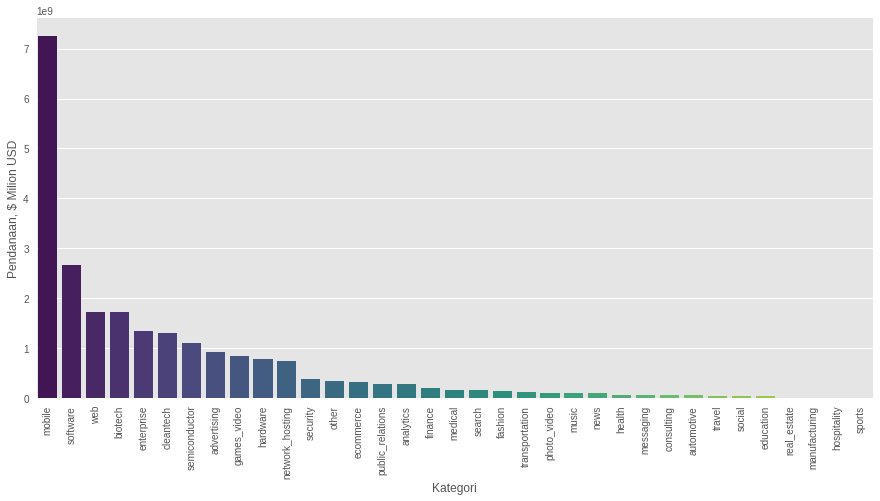

In [11]:
kategori_pendanaan = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
kategori_pendanaan.columns = ['category_code', 'funding_total_usd']
kategori_pendanaan = kategori_pendanaan.sort_values(['funding_total_usd'], ascending = False)
kategori_pendanaan.head(10)
fig, ax = plt.subplots(figsize=(15,7))
rate_pendanaan = sns.barplot(x="category_code", y="funding_total_usd", data=kategori_pendanaan, ax=ax, palette='viridis')
rate_pendanaan = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
rate_pendanaan = ax.set(xlabel="Kategori", ylabel="Pendanaan, $ Milion USD")

Melalui bar graph diatas bisa diketahui bahwa pendanaan startup terbanyak jatuh kepada startup "Mobile" dengan angka 7 juta USD


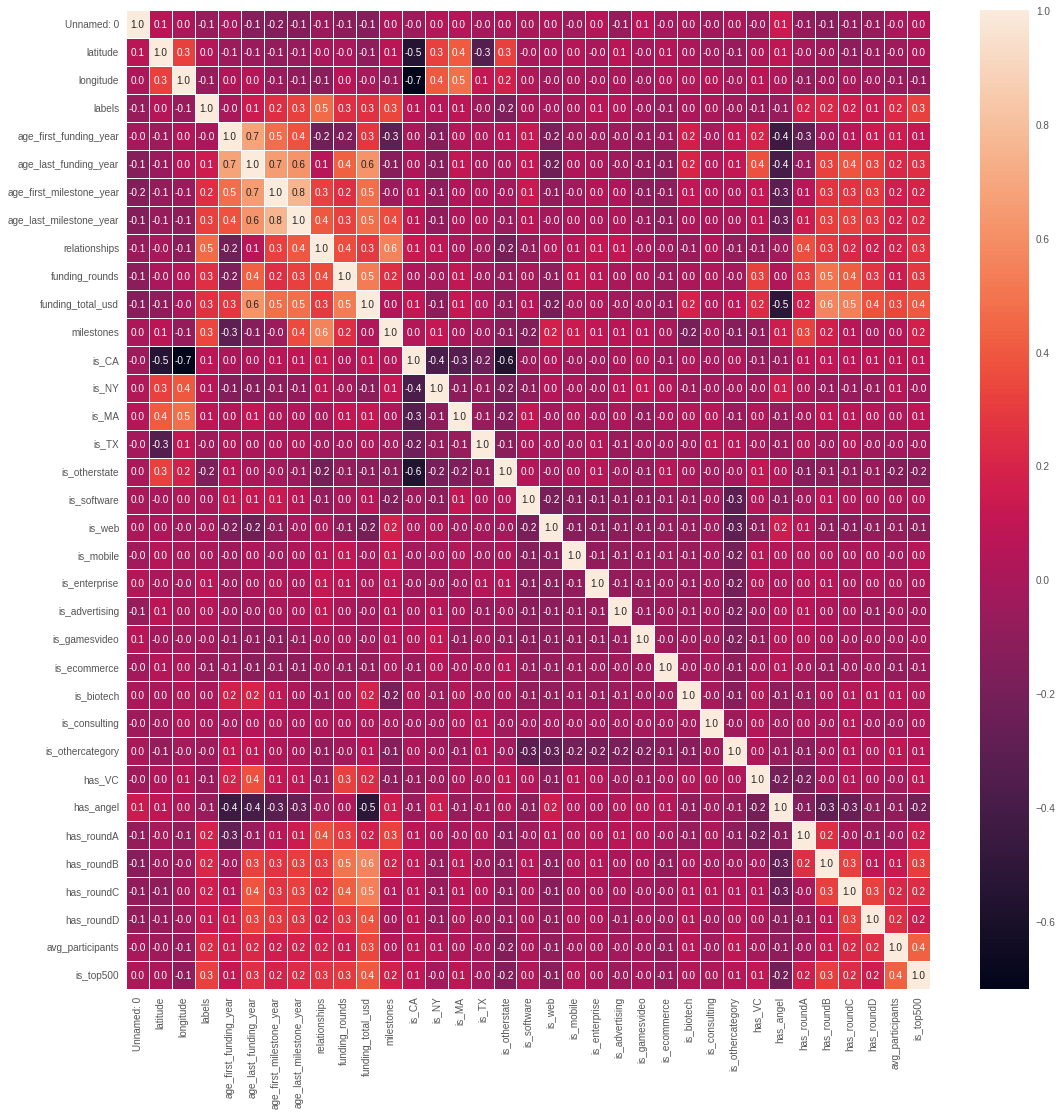

In [12]:
def heatmap(dataset):
    f, ax = plt.subplots(figsize = (18, 18))
    corrMatt = df.corr(method='spearman')
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()
    
num_cols = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols_names = df.select_dtypes(num_cols).columns 
num_startup_data = df.select_dtypes(num_cols)

heatmap(num_cols_names)

Pada correlation matrix diatas bisa diketahui bahwa "age_first_funding_year, age_last_funding_year, age_first_milestone_year, age_last_milestone_year" memiliki korelasi yang kuat di ambang batas sebesar 0.7 maka dari itu bisa disimpulkan bahwa ke empat feature ini merupakan feature importance pada proses training nanti.

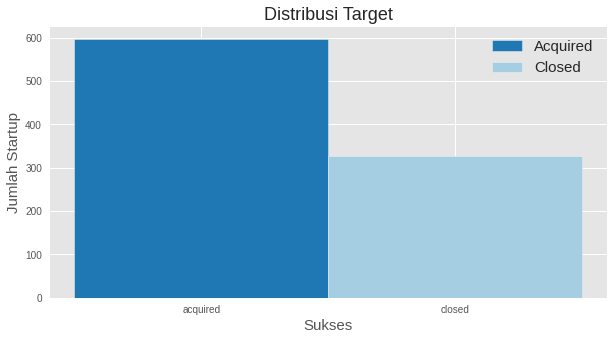

In [13]:
classes = df['labels'].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(df, x=df['status'], binwidth=0.1, hue=df["labels"], palette="Paired", alpha=1 )
plt.legend(['Acquired', 'Closed'], fontsize=15)
plt.ylabel('Jumlah Startup',fontsize=15)
plt.xlabel('Sukses',fontsize=15)
plt.title('Distribusi Target',fontsize=18)
plt.show()

Terdapat imbalance dataset pada kolom "status" dimana jumlah "acquired" lebih banyak dibandingkan "closed"

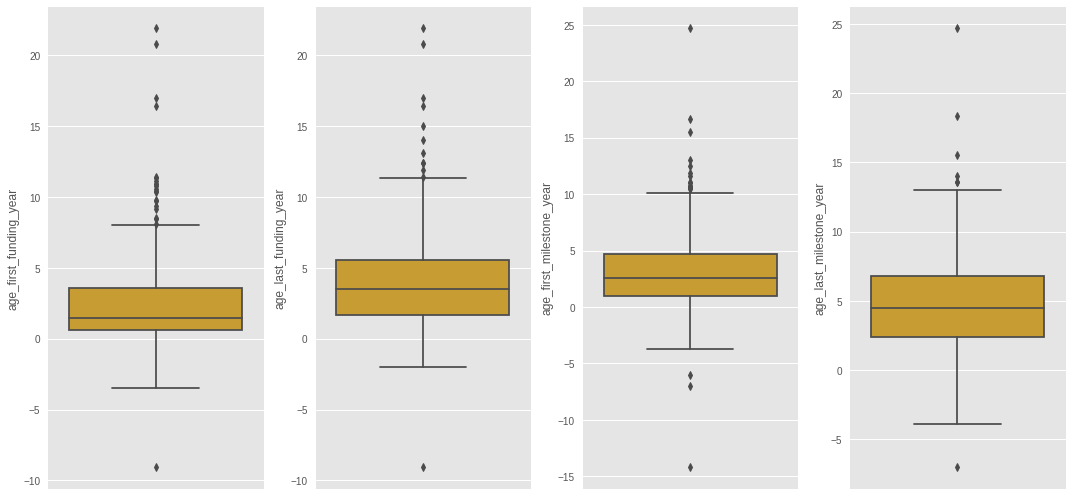

In [14]:
numAtr = ['age_first_funding_year',
               'age_last_funding_year',
               'age_first_milestone_year',
               'age_last_milestone_year']
plt.figure(figsize=(15, 7))
for i in range(0, len(numAtr)):
    plt.subplot(1, len(numAtr), i+1)
    sns.boxplot(y=df[numAtr[i]], hue=df['relationships'], color='goldenrod', saturation=0.8, orient='v')
    plt.tight_layout()

Beberapa outliers masih dapat ditemukan pada feature-feature diatas. Untuk itu kita perlu mengatasi outlier tersebut pada tahap pre-processing nanti. 

## Data Preprocessing

In [15]:
# melihat berapa banyak missing value yang ada pada data

df.isnull().sum().sort_values(ascending=False)

closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
Unnamed: 0                    0
is_biotech                    0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_othercategory              0
is_consulting                 0
is_otherstate                 0
object_id                     0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
category_code                 0
is_NY                         0
is_TX                         0
first_funding_at              0
latitude                      0
longitud

In [16]:
# Melihat persentase jumlah missing value pada kolom

print("Persentasi missing value pada kolom 'closed_at': % {:.2f}". format((df.closed_at.isnull().sum())/len(df)*100))
print("Persentasi missing value pada kolom 'Unnamed: 6': % {:.2f}". format((df["Unnamed: 6"].isnull().sum())/len(df)*100))
print("Persentasi missing value pada kolom 'age_last_milestone_year': % {:.2f}". format((df.age_last_milestone_year.isnull().sum())/len(df)*100))
print("Persentasi missing value pada kolom 'age_first_milestone_year': % {:.2f}". format((df.age_first_milestone_year.isnull().sum())/len(df)*100))

Persentasi missing value pada kolom 'closed_at': % 63.71
Persentasi missing value pada kolom 'Unnamed: 6': % 53.41
Persentasi missing value pada kolom 'age_last_milestone_year': % 16.47
Persentasi missing value pada kolom 'age_first_milestone_year': % 16.47


In [17]:
# Mengisi missing value pada kolom closed_at menggunakan 1 dan 0

df['closed_at'] = df['closed_at'].fillna(value="x")
df['closed_at'] = df.closed_at.apply(lambda x: 1 if x =='x' else 0)

totalNull = df['closed_at'].isnull().sum()
print('Total missing values pada kolom sebesar "closed_at": ', totalNull)

Total missing values pada kolom sebesar "closed_at":  0


In [18]:
# Menghapus value pada kolom yang memiliki nilai negatif

df= df.drop(df[df.age_first_funding_year < 0].index)
df = df.drop(df[df.age_last_funding_year < 0].index)
df = df.drop(df[df.age_first_milestone_year < 0].index)
df = df.drop(df[df.age_last_milestone_year < 0].index)

In [19]:
# Konversi tipe data int ke float dan mengisi missing value dengan 0

df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value="0")
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value="0")
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

In [20]:
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

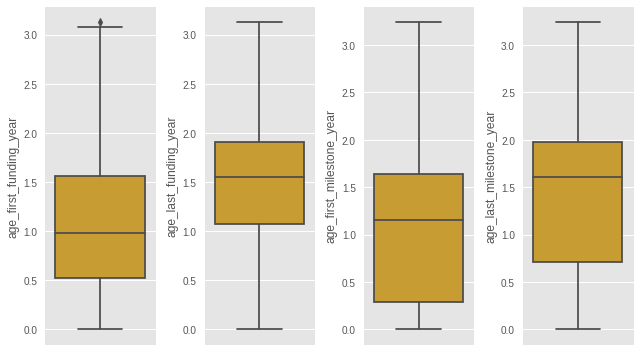

In [21]:
# Menampilkan boxplot untuk mendeteksi outliers

featuresNumfinal = ['age_first_funding_year',
                    'age_last_funding_year',
                    'age_first_milestone_year',
                    'age_last_milestone_year']

plt.figure(figsize=(9, 5))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[
        featuresNumfinal[i]], 
        hue=df['relationships'], 
        color='goldenrod', 
        saturation=0.8, )
    plt.tight_layout()

In [22]:
# Mengecek jumlah missing value

df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  449
name                          0
labels                        0
founded_at                    0
closed_at                     0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [23]:
# Mengubah data "target" ke 1 dan 0

df["status"] = np.where(df["status"]== 'closed', 0, 1)

In [24]:
# Mengecek banyaknya value yang terduplikat

duplicate = df.duplicated().sum() 
  
print("Duplicate Rows :", duplicate)

Duplicate Rows : 0


In [25]:
# Menghapus kolom-kolom yang tidak penting untuk proses training

train = df.drop(["Unnamed: 0", "Unnamed: 6", "labels",
                    "id", "latitude", "longitude", 
                    "zip_code", "state_code.1",
                    "object_id", "name", "labels"], axis=1)

In [26]:
# Memasukan atribut-atribut kategori pada variable

cat_features = ['funding_rounds', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA',
                'has_roundB', 'has_roundC', 'has_roundD',"city", 'is_CA', 'is_NY', 'is_MA', 
                'is_TX', 'is_otherstate','is_software', 'is_web', 'is_mobile', 'is_enterprise', 
                'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
                'is_othercategory','is_top500']

## Model Training

In [27]:
# Men-training model

experiment = setup(train, target='status', categorical_features=cat_features, normalize=True, transformation=True)

ValueError: ignored

## Evaluate the Models

In [28]:
# Komparasi model dengan akurasi terbaik

compare_models(cross_validation=True, sort="Accuracy")

RuntimeError: ignored

In [ ]:
# Membuat classifier model dengan Algoritma XGBoost

xgboost_model = create_model('xgboost')

NameError: ignored

Bisa dilihat bahwa rata-rata akurasi dengan XGBoost model ini mencapai 0.99 %

In [ ]:
# Mengevaluasi Model

evaluation_xgboost = evaluate_model(xgboost_model)

NameError: ignored

In [ ]:
lr_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9831,0.9902,0.9730,1.0000,0.9863,0.9641,0.9647
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9831,0.9853,0.9730,1.0000,0.9863,0.9641,0.9647
4,0.9831,0.9791,0.9730,1.0000,0.9863,0.9641,0.9647
5,0.9831,0.9912,0.9737,1.0000,0.9867,0.9634,0.9641
6,0.9831,0.9925,0.9737,1.0000,0.9867,0.9634,0.9641
7,0.9828,1.0000,1.0000,0.9737,0.9867,0.9623,0.9630
8,0.9828,0.9923,0.9730,1.0000,0.9863,0.9631,0.9637


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4105, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
evaluation_lr = evaluate_model(lr_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4105, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
dt_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9831,0.9865,0.9730,1.0000,0.9863,0.9641,0.9647
1,0.9831,0.9773,1.0000,0.9737,0.9867,0.9634,0.9641
2,0.9661,0.9545,1.0000,0.9487,0.9737,0.9262,0.9287
3,0.9492,0.9410,0.9730,0.9474,0.9600,0.8903,0.8909
4,0.9831,0.9865,0.9730,1.0000,0.9863,0.9641,0.9647
5,0.9831,0.9868,0.9737,1.0000,0.9867,0.9634,0.9641
6,0.9492,0.9392,0.9737,0.9487,0.9610,0.8879,0.8885
7,0.9483,0.9286,1.0000,0.9250,0.9610,0.8845,0.8904
8,0.9828,0.9865,0.9730,1.0000,0.9863,0.9631,0.9637


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4105, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
evaluation_dt = evaluate_model(dt_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4105, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Test the Models

In [ ]:
test = pd.read_csv("/content/test.csv")

FileNotFoundError: ignored

In [ ]:
predict_model(xgboost_model, test.tail())

NameError: ignored

bisa dilihat bahwa model berhasil memprediksi semua data dengan benar pada testing data yang kita gunakan

## Save the Models

In [ ]:
save_model(xgboost_model, model_name='ridge-model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...), model_name=ridge-model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['funding_rounds',
          

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['funding_rounds',
                                                             'milestones',
                                                             'category_code',
                                                             'has_VC',
                                                             'has_angel',
                                                             'has_roundA',
                                                             'has_roundB',
                                                             'has_roundC',
                                                             'has_roundD',
                                                             'city', 'is_CA',
                                                             'is_NY', 'is_MA',
                                                             'is_TX',
                                             